In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [2]:
import numpy as np

def data_frame(data, dimension=10000):
    results = np.zeros((len(data), dimension))
    for i, data in enumerate(data):
        results[i][data] = 1
    return results

x_train = data_frame(train_data)
x_test = data_frame(test_data)

In [3]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [4]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [5]:
import tensorflow as tf
model.compile(
              optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )

In [6]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [7]:
print(partial_x_train.shape)
print(partial_y_train.shape)

(7982, 10000)
(7982, 46)


In [8]:
history = model.fit(partial_x_train,
                     partial_y_train,
                     epochs=20,
                     batch_size=512,
                     validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 19ms/step - loss: 2.6369 - accuracy: 0.5362 - val_loss: 1.7311 - val_accuracy: 0.6450
Epoch 2/20
16/16 [==============================] - 0s 9ms/step - loss: 1.4349 - accuracy: 0.7028 - val_loss: 1.3237 - val_accuracy: 0.7020
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 1.0725 - accuracy: 0.7640 - val_loss: 1.1632 - val_accuracy: 0.7320
Epoch 4/20
16/16 [==============================] - 0s 9ms/step - loss: 0.8517 - accuracy: 0.8128 - val_loss: 1.0560 - val_accuracy: 0.7620
Epoch 5/20
16/16 [==============================] - 0s 8ms/step - loss: 0.6768 - accuracy: 0.8539 - val_loss: 0.9836 - val_accuracy: 0.7900
Epoch 6/20
16/16 [==============================] - 0s 9ms/step - loss: 0.5381 - accuracy: 0.8904 - val_loss: 0.9720 - val_accuracy: 0.7880
Epoch 7/20
16/16 [==============================] - 0s 8ms/step - loss: 0.4358 - accuracy: 0.9119 - val_loss: 0.9371 - val_accuracy: 0.8150
Epoch 8/20
16/16 [

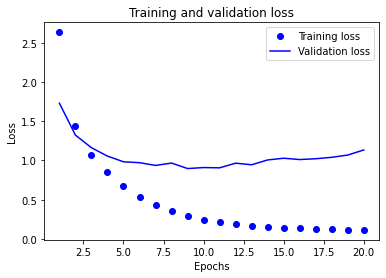

In [9]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

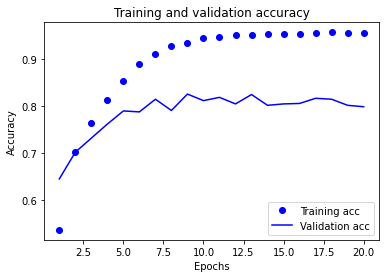

In [10]:
plt.clf() 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(
              optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 16ms/step - loss: 2.5249 - accuracy: 0.5272 - val_loss: 1.6724 - val_accuracy: 0.6430
Epoch 2/9
16/16 [==============================] - 0s 8ms/step - loss: 1.3802 - accuracy: 0.7051 - val_loss: 1.2891 - val_accuracy: 0.7060
Epoch 3/9
16/16 [==============================] - 0s 8ms/step - loss: 1.0468 - accuracy: 0.7732 - val_loss: 1.1215 - val_accuracy: 0.7620
Epoch 4/9
16/16 [==============================] - 0s 9ms/step - loss: 0.8299 - accuracy: 0.8205 - val_loss: 1.0562 - val_accuracy: 0.7760
Epoch 5/9
16/16 [==============================] - 0s 8ms/step - loss: 0.6655 - accuracy: 0.8613 - val_loss: 0.9778 - val_accuracy: 0.7940
Epoch 6/9
16/16 [==============================] - 0s 9ms/step - loss: 0.5276 - accuracy: 0.8916 - val_loss: 0.9189 - val_accuracy: 0.8150
Epoch 7/9
16/16 [==============================] - 0s 9ms/step - loss: 0.4209 - accuracy: 0.9146 - val_loss: 0.9085 - val_accuracy: 0.8130
Epoch 8/9
16/16 [=========

In [12]:
results

[1.0363414287567139, 0.7858415246009827]

In [13]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.1745325022261799

In [14]:
predictions = model.predict(x_test)

In [15]:
predictions[0].shape

(46,)

In [16]:
np.sum(predictions[0])

1.0000001

In [17]:
np.argmax(predictions[0])

4